# Text2Graph
## Training Part-of-Speech Tagging Model

In [1]:
from nltk.corpus import conll2000
from nltk.corpus import brown
from nltk.corpus import treebank
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

2022-01-20 18:26:53.092667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-20 18:26:53.092685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#import nltk
#nltk.download('all')
corpus = treebank.tagged_sents(tagset='universal')
corpus = corpus + brown.tagged_sents(tagset='universal')
corpus = corpus + conll2000.tagged_sents(tagset='universal')
print(f'treebank size {len(corpus)} sentences')

treebank size 72202 sentences


In [3]:
#Sampling of a clear sentence
rand_id = random.randint(0, len(corpus)-1)
for sent_tuple in corpus[ rand_id ]:
    print(f'{ sent_tuple[0] }\t:\t{ sent_tuple[1] }')

He	:	PRON
is	:	VERB
the	:	DET
sort	:	NOUN
who	:	PRON
,	:	.
with	:	ADP
an	:	DET
appraising	:	VERB
eye	:	NOUN
,	:	.
would	:	VERB
cross	:	VERB
the	:	DET
street	:	NOUN
to	:	PRT
help	:	VERB
a	:	DET
strange	:	ADJ
woman	:	NOUN
on	:	ADP
to	:	ADP
a	:	DET
bus	:	NOUN
and	:	CONJ
then	:	ADV
pinch	:	VERB
her	:	PRON
.	:	.


In [4]:
#splitting the corpus into 2 lists one for sentences and the other for each sentence tags
sentences = []
sentences_tags = []
sentences_raw = [] # words merged for each sentence
all_words = []
all_tags = []
lengths = []
df = pd.DataFrame()
for sentenc_tagged in corpus:
    sentence = []
    tags = []
    for word,tag in sentenc_tagged:
        sentence.append(word)
        tags.append(tag)
        all_words.append(word)
        all_tags.append(tag)
    sentences.append(sentence)
    sentences_tags.append(tags)
    lengths.append(len(sentence))
    sentences_raw.append(' '.join(sentence))
X = np.array(sentences , dtype=object)
Y = np.array(sentences_tags , dtype=object)

print(f'{sentences[0]}')
print(f'{sentences_tags[0]}')

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']


In [20]:
all_words_df=pd.DataFrame(all_words) # to dataframe
all_words_df=all_words_df.groupby(all_words_df[0])
all_words_df.size()#.max()

0
!            1619
#              63
$            2824
$.027           2
$.03            4
             ... 
zorrillas       1
zounds          2
zu              1
zur             1
{0,T}           1
Length: 67067, dtype: int64

count    72202.000000
mean        21.065511
std         12.914019
min          1.000000
25%         12.000000
50%         19.000000
75%         28.000000
max        271.000000
Name: lengths, dtype: float64
lengths
1     341
2     822
3    1146
4    1198
5    1476
dtype: int64


<AxesSubplot:xlabel='lengths'>

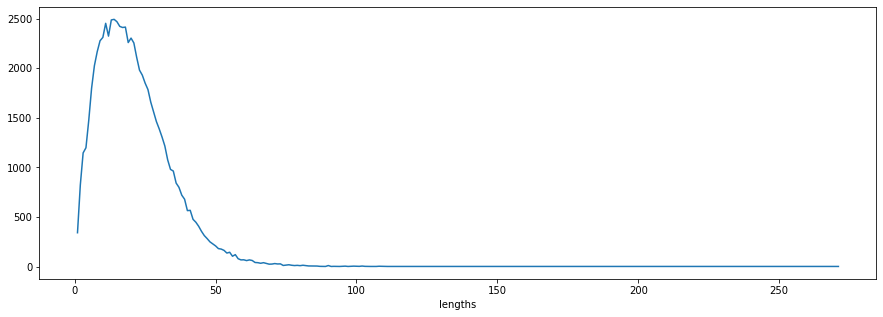

In [7]:
#lengths chart
df['lengths'] = lengths
print(df['lengths'].describe())
lengths_count = df.groupby('lengths').size()

print(lengths_count.head(5))
lengths_count.plot(figsize=(15,5))

X : 8064
NUM : 28653
PRT : 41605
CONJ : 47002
PRON : 59685
ADV : 68574
ADJ : 107673
DET : 169575
ADP : 182458
. : 191080
VERB : 233496
NOUN : 383107


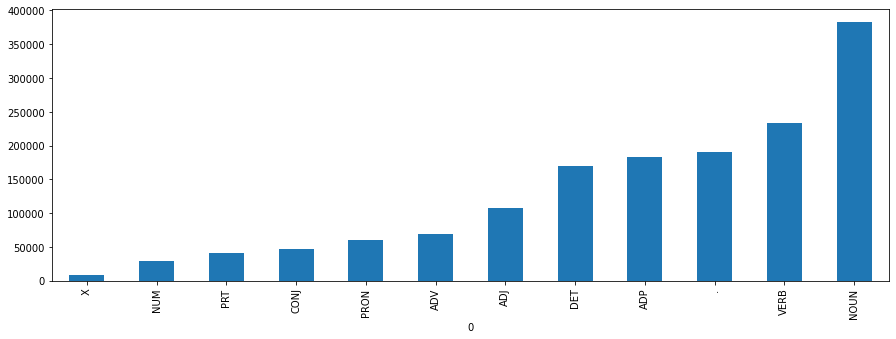

In [8]:
#tags chart
tags_df=pd.DataFrame(all_tags)
tags_grouped = tags_df.groupby(tags_df[0])
tags_df=tags_grouped.size().sort_values()
tags_df.plot.bar(figsize=(15,5))
for b in tags_df.keys():
    print(f"{b} : {tags_df[b]}")

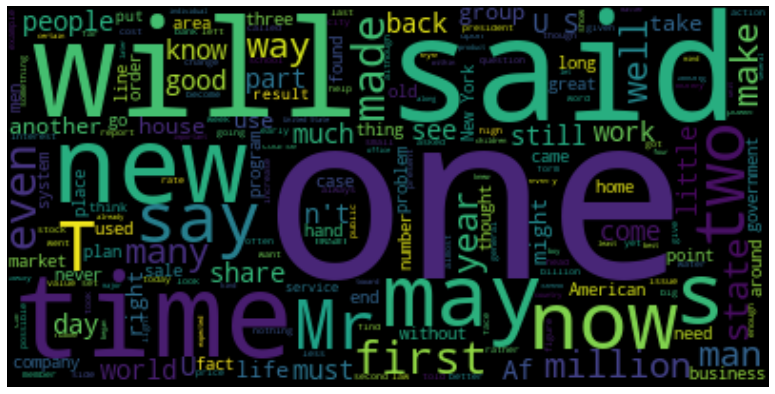

In [9]:
# Create and generate a word cloud image:
compine_string=(" ").join(all_words)

wordcloud = WordCloud().generate(compine_string)

# Display the generated image:
plt.figure(figsize = (20,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

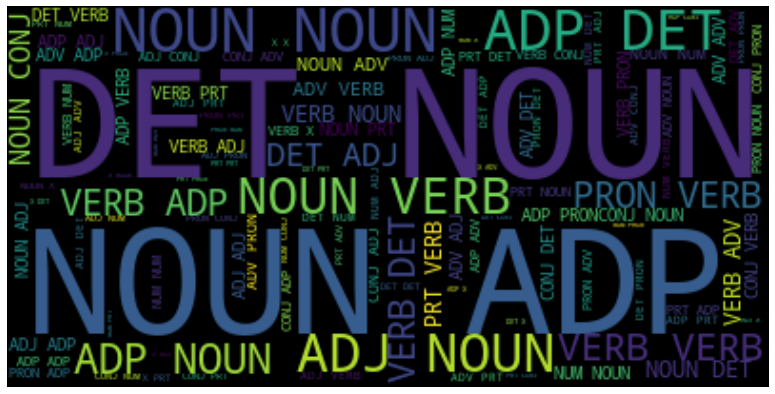

In [10]:
# Create and generate a word cloud image:
compine_string=(" ").join(all_tags)

wordcloud = WordCloud().generate(compine_string)

# Display the generated image:
plt.figure(figsize = (20,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:

x_tokenizer  = keras.preprocessing.text.Tokenizer(
    num_words=len(all_words_df),
lower=False,#False because in POS capitalization matters 
)
x_tokenizer.fit_on_texts(X)
X_sequences = x_tokenizer.texts_to_sequences(X)

#Y_categorical = keras.utils.to_categorical(Y)


y_tokenizer  = keras.preprocessing.text.Tokenizer(
lower=False,
)
y_tokenizer.fit_on_texts(Y)
Y_sequences = y_tokenizer.texts_to_sequences(Y)
print(f"print(texts_to_sequences) {Y_sequences[2]}")

print(texts_to_sequences) [1, 1, 3, 11, 1, 6, 9, 6, 1, 4, 1, 1, 1, 1, 3, 2, 2, 12, 5, 6, 1, 4, 5, 6, 6, 1, 3]


In [ ]:
#No preprocessing since all tags are important in POS tagging

#vectorization

vectorizer = CountVectorizer()
#X_CountVectorizer = vectorizer.fit_transform(x_tokenized)


In [14]:
#padding
PADDING_SIZE=50
X_padded = keras.preprocessing.sequence.pad_sequences(
    X_sequences,maxlen=PADDING_SIZE,padding='post',truncating='post')
Y_padded = keras.preprocessing.sequence.pad_sequences(
    Y_sequences,maxlen=PADDING_SIZE,padding='post',truncating='post')
print(f"X_padded {X_padded.shape}")
print(f"Y_padded {Y_padded.shape}")
print(Y_padded[2])
Y_padded = keras.utils.to_categorical(Y_padded)
Y_padded.shape

X_padded (72202, 50)
Y_padded (72202, 50)
[ 1  1  3 11  1  6  9  6  1  4  1  1  1  1  3  2  2 12  5  6  1  4  5  6
  6  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


(72202, 50, 13)

In [15]:
#split into train,val,test
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y_padded, test_size=0.1, random_state=42)

In [24]:
#many-to-many RNN , sequence to sequence
model = keras.Sequential()

#model.add( keras.layers.Input( shape= (32,50,) ) )
model.add(
keras.layers.Embedding(
input_dim=len(all_words_df),
    output_dim=256,
    input_length=PADDING_SIZE,
)
)

model.add( keras.layers.SimpleRNN(128,return_sequences=True))

model.add(keras.layers.TimeDistributed(
    keras.layers.Dense(len(tags_grouped)+1, activation='softmax')
)) #2D output
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 256)           17169152  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50, 128)           49280     
                                                                 
 time_distributed_3 (TimeDis  (None, 50, 13)           1677      
 tributed)                                                       
                                                                 
Total params: 17,220,109
Trainable params: 17,220,109
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x=X_train,y=Y_train,batch_size=32,epochs=15,validation_split=0.1)

Epoch 1/15
1828/1828 [==============================] - 272s 148ms/step - loss: 0.1496 - accuracy: 0.9557 - val_loss: 0.0539 - val_accuracy: 0.9804
Epoch 2/15
1828/1828 [==============================] - 275s 150ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.0529 - val_accuracy: 0.9813
Epoch 3/15
1828/1828 [==============================] - 273s 149ms/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.0570 - val_accuracy: 0.9806
Epoch 4/15
1828/1828 [==============================] - 272s 149ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0639 - val_accuracy: 0.9801
Epoch 5/15
1828/1828 [==============================] - 273s 149ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0723 - val_accuracy: 0.9797
Epoch 6/15
1828/1828 [==============================] - 272s 149ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0781 - val_accuracy: 0.9792
Epoch 7/15
1828/1828 [==============================] - 283s 155ms/step - loss: 0.0075 - accuracy: 0.9975 - val_

In [26]:
results=model.evaluate(X_test,Y_test,batch_size=32)
print(results)

226/226 [==============================] - 1s 4ms/step - loss: 0.1067 - accuracy: 0.9781
[0.1067056804895401, 0.978088915348053]


In [28]:
model.save('pos_model.h5')
model.save_spec('pos_model_spec.h5')
model.save_weights('pos_model_weights.h5')